In [214]:
#필요한 함수들 호출
import urllib.request
import urllib.parse
from bs4 import BeautifulSoup
import time
import re
import pandas as pd
import json

In [215]:
#matplotlib 기본설정해주기

%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

#폰트매니저 호출해주기
from matplotlib import font_manager, rc
font_url = 'C:/Windows/Fonts/SDMISAENG (1).ttf'
font_name = font_manager.FontProperties(fname=font_url).get_name()
print(font_name)
plt.rcParams["font.family"] = font_name
rc('font', family=font_name)

Sandoll MiSaeng


In [216]:
#필요한 변수들
year = '2010-10-01'
api_key = '키값을 넣어주세요!'
id ='1459'
url = f'http://www.kamis.or.kr/service/price/xml.do?action=dailyPriceByCategoryList&p_product_cls_code=02&p_country_code=1101&p_regday={year}&p_convert_kg_yn=N&p_item_category_code=200&p_cert_key={api_key}&p_cert_id={id}&p_returntype=json'

In [217]:
html = urllib.request.urlopen(url).read()
data = json.loads(html)
item = data['data']['item'][0]
item

{'item_name': '배추',
 'item_code': '211',
 'kind_name': '고랭지(10kg)',
 'kind_code': '02',
 'rank': '상품',
 'rank_code': '04',
 'unit': '10kg',
 'day1': '당일 (10/01)',
 'dpr1': '30,000',
 'day2': '1일전 (09/30)',
 'dpr2': '31,000',
 'day3': '1주일전 (09/24)',
 'dpr3': '23,000',
 'day4': '2주일전 (09/17)',
 'dpr4': '18,000',
 'day5': '1개월전',
 'dpr5': '10,000',
 'day6': '1년전',
 'dpr6': '6,200',
 'day7': '일평년',
 'dpr7': '7,500'}

In [218]:
item_name = item['item_name']
당일 = item['dpr1']
하루전 = item['dpr2']
일주일전 = item['dpr3']
이주일전 = item['dpr4']
일개월전= item['dpr5']
일년전 = item['dpr6']
일평년 = item['dpr7']

In [219]:
날짜 = ['당일', '하루전', '일주일전', '이주일전', '일개월전', '일년전', '일평년']
시세 = [당일, 하루전, 일주일전, 이주일전, 일개월전, 일년전, 일평년]
배추_시세 = list(zip(날짜,시세))
df = pd.DataFrame(data = 배추_시세, columns=['날짜', '시세'])
df['시세'] = df['시세'].str.replace(',', '').str.replace('-', '0').astype('int64')
df

,날짜,시세
0,당일,30000
1,하루전,31000
2,일주일전,23000
3,이주일전,18000
4,일개월전,10000
5,일년전,6200
6,일평년,7500


Text(0.5, 1.0, '2010-10-01 배추시세')

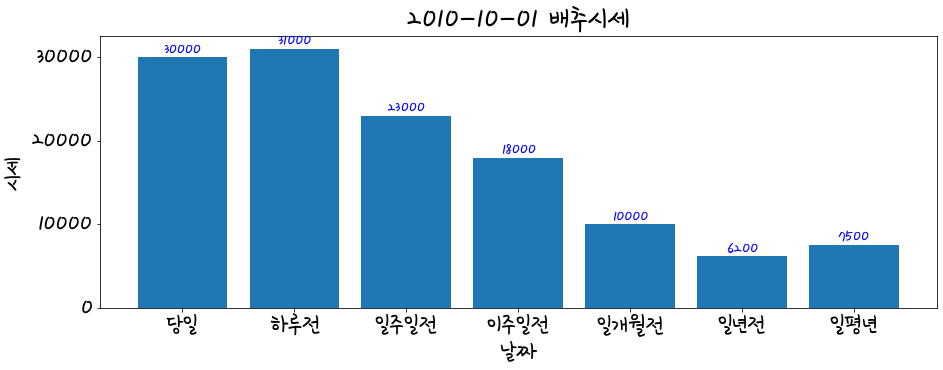

In [220]:
plt.rcParams["font.size"] = 30
plt.figure (figsize=(15,5))

x= df['날짜']
y = df['시세']
#막대그래프 객체 생성
plt.bar(x,y)

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
                fontsize = 20, 
                color='blue',
                horizontalalignment='center',  # horizontalalignment (left, center, right)
                verticalalignment='bottom')    # verticalalignment (top, center, bottom)
plt.xlabel('날짜')
plt.ylabel('시세')
plt.title(f'{year} {item_name}시세')